In [1]:
import os
from os.path import expanduser
import socket
import sys


# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "awi-models")
elif running_system[0:1] == "b" or running_system == systemHLRN:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"awi-models")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append("codes/modules")
#########################################

computer =  bfn1005
working directory set to /home/hbkoziel/awi-models


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pylab import *
from load_mesh_data_new import *
import numpy as np
import datetime as dt
from PiecewiseNorm import PiecewiseNorm
from netCDF4 import Dataset
import colormaps as cmaps
from matplotlib.colors import ListedColormap

In [3]:
# PLOT CONFIGURATION #

# load colormaps #
cmap = plt.get_cmap('RdBu_r')
# figure export 
export_plot = True
# figure export definition
dpicnt=150
# choose simulation
runid='Arc12'
# choose date
first_year = 1990
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
months =np.linspace(0,11,12).astype(int)
# choose depth
get3d = True
# load the given biological tracer #
var_id1, var_id2 = 'tr06', 'tr15'
# export CSV
export_csv = True

########################

# AUTOMATIC DEFINITION OF PATHS
resultpath = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/Oldfiles/'
savepath    = wd_path+'/figures/'+runid+'/'
meshpath    = wd_path+'/data/mesh/meshArc4.5/'
outputpath = '/scratch/usr/hbkoziel/Arc12/'

# Create figure directory if it does not exist
if os.path.exists(savepath) == False:
    try:
        os.mkdir(savepath)
        print ("Creation of the directory %s successfull" % savepath)
    except OSError:
        print ("Creation of the directory %s failed" % savepath)
else:
    print ("directory %s already existing" % savepath)
    
#ncfile      = resultpath+runid+'.initial.mesh.diag.nc'
#f           = Dataset(ncfile, 'r')
#NodalArea = f.variables['cluster_area'][:]
#NodalVol    = f.variables['cluster_vol'][:]
#f.close()

directory /home/hbkoziel/awi-models/figures/Arc12/ already existing


In [4]:
mesh = fesom_mesh(meshpath, get3d = get3d)
mesh.n32 = mesh.n32-1

Load 2d part of the grid in 3 second(s)
Load 3d part of the grid in 33 seconds


In [ ]:
DEPTHS  = np.zeros((len(years),len(mesh.x2)))
CONC    = np.zeros((len(years),len(mesh.x2)))

for ye in range(0,len(years)):
 print years[ye]
 if years[ye] < 2000:
    depths= np.zeros(len(mesh.x2))
    conc= np.zeros(len(mesh.x2))
    ind=4
    ncfile  = resultpath+runid+'.'+str(years[ye])+'.oce.mean.nc'
    f       = Dataset(ncfile, 'r')    
    chl     = f.variables[var_id1][ind,:] + f.variables[var_id2][ind,:]
    
    for i in range(0,len(mesh.x2)):
        deep_ind = mesh.n32[i,:]
        deep_ind = deep_ind[deep_ind>-10]
        loc_chl  = chl[deep_ind] # All chl in the water column
        loc_chl  = loc_chl[loc_chl>0.01]
        if (len(loc_chl)>0 and loc_chl.argmax(axis=0)>0):
          scm_i = loc_chl.argmax(axis=0)
          depths[i]  = depths[i] + mesh.zlevs[scm_i]
          conc[i]    = conc[i] + loc_chl[scm_i]

    DEPTHS[ye,:]  = depths
    CONC[ye,:]    = conc
 
 else:
  dayind = (range(45,59))
  depths= np.zeros(len(mesh.x2))
  conc= np.zeros(len(mesh.x2))
  for ind in dayind:

    ncfile  = resultpath+runid+'.'+str(years[ye])+'.oce.mean.nc'
    f       = Dataset(ncfile, 'r')    
    chl     = f.variables[var_id1][ind,:] + f.variables[var_id2][ind,:]
    for i in range(0,len(mesh.x2)):
        deep_ind = mesh.n32[i,:]
        deep_ind = deep_ind[deep_ind>-10]
        loc_chl  = chl[deep_ind] # All chl in the water column
        loc_chl  = loc_chl[loc_chl>0.01]
        if (len(loc_chl)>0 and loc_chl.argmax(axis=0)>0):
          scm_i = loc_chl.argmax(axis=0)
          depths[i]  = depths[i] + mesh.zlevs[scm_i]
          conc[i]    = conc[i] + loc_chl[scm_i]


    DEPTHS[ye,:]  = depths/len(dayind)
    CONC[ye,:]    = conc/len(dayind)
    
DEPTHS_mean=DEPTHS.mean(axis=0)
CONC_mean=CONC.mean(axis=0)

if export_csv == True:
    np.savetxt(outputpath+'SCMdepth_APR_'+str(first_year)+'_'+str(last_year)+'_trend.csv', DEPTHS, delimiter=";")
    np.savetxt(outputpath+'SCMconc_APR_'+str(first_year)+'_'+str(last_year)+'_trend.csv', CONC, delimiter=";")
    np.savetxt(outputpath+'SCMdepth_APR_'+str(first_year)+'_'+str(last_year)+'_mean.csv', DEPTHS_mean, delimiter=";")
    np.savetxt(outputpath+'SCMconc_APR_'+str(first_year)+'_'+str(last_year)+'_mean.csv', CONC_mean, delimiter=";")
    print 'exporting done ...'

1990 4
1991 4
1992 4
1993 4
1994 4
1995 4
1996 4
1997 4
1998 4
1999 4
2000 45
2000 46
2000 47
2000 48
2000 49
2000 50
2000 51
2000 52
2000 53
2000 54
2000 55
2000 56
2000 57
2000 58
2001 45
2001 46
2001 47
2001 48
2001 49
2001 50
2001 51
2001 52
2001 53


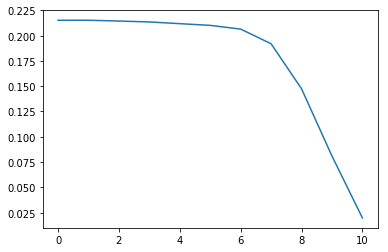

In [44]:
DEPTHS  = np.zeros((len(years),len(mesh.x2)))
CONC    = np.zeros((len(years),len(mesh.x2)))

for ye in range(0,len(years)):
 print years[ye]
 if years[ye] < 2000:
    depths= np.zeros(len(mesh.x2))
    conc= np.zeros(len(mesh.x2))
    ind=5
    ncfile  = resultpath+runid+'.'+str(years[ye])+'.oce.mean.nc'
    f       = Dataset(ncfile, 'r')    
    chl     = f.variables[var_id1][ind,:] + f.variables[var_id2][ind,:]
    
    for i in range(0,len(mesh.x2)):
        deep_ind = mesh.n32[i,:]
        deep_ind = deep_ind[deep_ind>-10]
        loc_chl  = chl[deep_ind] # All chl in the water column
        loc_chl  = loc_chl[loc_chl>0.01]
        if (len(loc_chl)>0 and loc_chl.argmax(axis=0)>0):
          scm_i = loc_chl.argmax(axis=0)
          depths[i]  = depths[i] + mesh.zlevs[scm_i]
          conc[i]    = conc[i] + loc_chl[scm_i]

    DEPTHS[ye,:]  = depths
    CONC[ye,:]    = conc
 
 else:
  dayind = (range(60,74))
  depths= np.zeros(len(mesh.x2))
  conc= np.zeros(len(mesh.x2))
  for ind in dayind:

    ncfile  = resultpath+runid+'.'+str(years[ye])+'.oce.mean.nc'
    f       = Dataset(ncfile, 'r')    
    chl     = f.variables[var_id1][ind,:] + f.variables[var_id2][ind,:]
    for i in range(0,len(mesh.x2)):
        deep_ind = mesh.n32[i,:]
        deep_ind = deep_ind[deep_ind>-10]
        loc_chl  = chl[deep_ind] # All chl in the water column
        loc_chl  = loc_chl[loc_chl>0.01]
        if (len(loc_chl)>0 and loc_chl.argmax(axis=0)>0):
          scm_i = loc_chl.argmax(axis=0)
          depths[i]  = depths[i] + mesh.zlevs[scm_i]
          conc[i]    = conc[i] + loc_chl[scm_i]


    DEPTHS[ye,:]  = depths/len(dayind)
    CONC[ye,:]    = conc/len(dayind)
    
DEPTHS_mean=DEPTHS.mean(axis=0)
CONC_mean=CONC.mean(axis=0)

if export_csv == True:
    np.savetxt(outputpath+'SCMdepth_MAY_'+str(first_year)+'_'+str(last_year)+'_trend.csv', DEPTHS, delimiter=";")
    np.savetxt(outputpath+'SCMconc_MAY_'+str(first_year)+'_'+str(last_year)+'_trend.csv', CONC, delimiter=";")
    np.savetxt(outputpath+'SCMdepth_MAY_'+str(first_year)+'_'+str(last_year)+'_mean.csv', DEPTHS_mean, delimiter=";")
    np.savetxt(outputpath+'SCMconc_MAY_'+str(first_year)+'_'+str(last_year)+'_mean.csv', CONC_mean, delimiter=";")
    print 'exporting done ...'

In [ ]:
DEPTHS  = np.zeros((len(years),len(mesh.x2)))
CONC    = np.zeros((len(years),len(mesh.x2)))

for ye in range(0,len(years)):
 print years[ye]
 if years[ye] < 2000:
    depths= np.zeros(len(mesh.x2))
    conc= np.zeros(len(mesh.x2))
    ind=6
    ncfile  = resultpath+runid+'.'+str(years[ye])+'.oce.mean.nc'
    f       = Dataset(ncfile, 'r')    
    chl     = f.variables[var_id1][ind,:] + f.variables[var_id2][ind,:]
    
    for i in range(0,len(mesh.x2)):
        deep_ind = mesh.n32[i,:]
        deep_ind = deep_ind[deep_ind>-10]
        loc_chl  = chl[deep_ind] # All chl in the water column
        loc_chl  = loc_chl[loc_chl>0.01]
        if (len(loc_chl)>0 and loc_chl.argmax(axis=0)>0):
          scm_i = loc_chl.argmax(axis=0)
          depths[i]  = depths[i] + mesh.zlevs[scm_i]
          conc[i]    = conc[i] + loc_chl[scm_i]

    DEPTHS[ye,:]  = depths
    CONC[ye,:]    = conc
 
 else:
  dayind = (range(75,89))
  depths= np.zeros(len(mesh.x2))
  conc= np.zeros(len(mesh.x2))
  for ind in dayind:

    ncfile  = resultpath+runid+'.'+str(years[ye])+'.oce.mean.nc'
    f       = Dataset(ncfile, 'r')    
    chl     = f.variables[var_id1][ind,:] + f.variables[var_id2][ind,:]
    for i in range(0,len(mesh.x2)):
        deep_ind = mesh.n32[i,:]
        deep_ind = deep_ind[deep_ind>-10]
        loc_chl  = chl[deep_ind] # All chl in the water column
        loc_chl  = loc_chl[loc_chl>0.01]
        if (len(loc_chl)>0 and loc_chl.argmax(axis=0)>0):
          scm_i = loc_chl.argmax(axis=0)
          depths[i]  = depths[i] + mesh.zlevs[scm_i]
          conc[i]    = conc[i] + loc_chl[scm_i]


    DEPTHS[ye,:]  = depths/len(dayind)
    CONC[ye,:]    = conc/len(dayind)
    
DEPTHS_mean=DEPTHS.mean(axis=0)
CONC_mean=CONC.mean(axis=0)

if export_csv == True:
    np.savetxt(outputpath+'SCMdepth_JUN_'+str(first_year)+'_'+str(last_year)+'_trend.csv', DEPTHS, delimiter=";")
    np.savetxt(outputpath+'SCMconc_JUN_'+str(first_year)+'_'+str(last_year)+'_trend.csv', CONC, delimiter=";")
    np.savetxt(outputpath+'SCMdepth_JUN_'+str(first_year)+'_'+str(last_year)+'_mean.csv', DEPTHS_mean, delimiter=";")
    np.savetxt(outputpath+'SCMconc_JUN_'+str(first_year)+'_'+str(last_year)+'_mean.csv', CONC_mean, delimiter=";")
    print 'exporting done ...'

In [ ]:
DEPTHS  = np.zeros((len(years),len(mesh.x2)))
CONC    = np.zeros((len(years),len(mesh.x2)))

for ye in range(0,len(years)):
 print years[ye]
 if years[ye] < 2000:
    depths= np.zeros(len(mesh.x2))
    conc= np.zeros(len(mesh.x2))
    ind=7
    ncfile  = resultpath+runid+'.'+str(years[ye])+'.oce.mean.nc'
    f       = Dataset(ncfile, 'r')    
    chl     = f.variables[var_id1][ind,:] + f.variables[var_id2][ind,:]
    
    for i in range(0,len(mesh.x2)):
        deep_ind = mesh.n32[i,:]
        deep_ind = deep_ind[deep_ind>-10]
        loc_chl  = chl[deep_ind] # All chl in the water column
        loc_chl  = loc_chl[loc_chl>0.01]
        if (len(loc_chl)>0 and loc_chl.argmax(axis=0)>0):
          scm_i = loc_chl.argmax(axis=0)
          depths[i]  = depths[i] + mesh.zlevs[scm_i]
          conc[i]    = conc[i] + loc_chl[scm_i]

    DEPTHS[ye,:]  = depths
    CONC[ye,:]    = conc
 
 else:
  dayind = (range(90,105))
  depths= np.zeros(len(mesh.x2))
  conc= np.zeros(len(mesh.x2))
  for ind in dayind:

    ncfile  = resultpath+runid+'.'+str(years[ye])+'.oce.mean.nc'
    f       = Dataset(ncfile, 'r')    
    chl     = f.variables[var_id1][ind,:] + f.variables[var_id2][ind,:]
    for i in range(0,len(mesh.x2)):
        deep_ind = mesh.n32[i,:]
        deep_ind = deep_ind[deep_ind>-10]
        loc_chl  = chl[deep_ind] # All chl in the water column
        loc_chl  = loc_chl[loc_chl>0.01]
        if (len(loc_chl)>0 and loc_chl.argmax(axis=0)>0):
          scm_i = loc_chl.argmax(axis=0)
          depths[i]  = depths[i] + mesh.zlevs[scm_i]
          conc[i]    = conc[i] + loc_chl[scm_i]


    DEPTHS[ye,:]  = depths/len(dayind)
    CONC[ye,:]    = conc/len(dayind)
    
DEPTHS_mean=DEPTHS.mean(axis=0)
CONC_mean=CONC.mean(axis=0)

if export_csv == True:
    np.savetxt(outputpath+'SCMdepth_JUL_'+str(first_year)+'_'+str(last_year)+'_trend.csv', DEPTHS, delimiter=";")
    np.savetxt(outputpath+'SCMconc_JUL_'+str(first_year)+'_'+str(last_year)+'_trend.csv', CONC, delimiter=";")
    np.savetxt(outputpath+'SCMdepth_JUL_'+str(first_year)+'_'+str(last_year)+'_mean.csv', DEPTHS_mean, delimiter=";")
    np.savetxt(outputpath+'SCMconc_JUL_'+str(first_year)+'_'+str(last_year)+'_mean.csv', CONC_mean, delimiter=";")
    print 'exporting done ...'

In [ ]:
DEPTHS  = np.zeros((len(years),len(mesh.x2)))
CONC    = np.zeros((len(years),len(mesh.x2)))

for ye in range(0,len(years)):
 print years[ye]
 if years[ye] < 2000:
    depths= np.zeros(len(mesh.x2))
    conc= np.zeros(len(mesh.x2))
    ind=8
    ncfile  = resultpath+runid+'.'+str(years[ye])+'.oce.mean.nc'
    f       = Dataset(ncfile, 'r')    
    chl     = f.variables[var_id1][ind,:] + f.variables[var_id2][ind,:]
    
    for i in range(0,len(mesh.x2)):
        deep_ind = mesh.n32[i,:]
        deep_ind = deep_ind[deep_ind>-10]
        loc_chl  = chl[deep_ind] # All chl in the water column
        loc_chl  = loc_chl[loc_chl>0.01]
        if (len(loc_chl)>0 and loc_chl.argmax(axis=0)>0):
          scm_i = loc_chl.argmax(axis=0)
          depths[i]  = depths[i] + mesh.zlevs[scm_i]
          conc[i]    = conc[i] + loc_chl[scm_i]

    DEPTHS[ye,:]  = depths
    CONC[ye,:]    = conc
 
 else:
  dayind = (range(106,120))
  depths= np.zeros(len(mesh.x2))
  conc= np.zeros(len(mesh.x2))
  for ind in dayind:

    ncfile  = resultpath+runid+'.'+str(years[ye])+'.oce.mean.nc'
    f       = Dataset(ncfile, 'r')    
    chl     = f.variables[var_id1][ind,:] + f.variables[var_id2][ind,:]
    for i in range(0,len(mesh.x2)):
        deep_ind = mesh.n32[i,:]
        deep_ind = deep_ind[deep_ind>-10]
        loc_chl  = chl[deep_ind] # All chl in the water column
        loc_chl  = loc_chl[loc_chl>0.01]
        if (len(loc_chl)>0 and loc_chl.argmax(axis=0)>0):
          scm_i = loc_chl.argmax(axis=0)
          depths[i]  = depths[i] + mesh.zlevs[scm_i]
          conc[i]    = conc[i] + loc_chl[scm_i]


    DEPTHS[ye,:]  = depths/len(dayind)
    CONC[ye,:]    = conc/len(dayind)
    
DEPTHS_mean=DEPTHS.mean(axis=0)
CONC_mean=CONC.mean(axis=0)

if export_csv == True:
    np.savetxt(outputpath+'SCMdepth_AUG_'+str(first_year)+'_'+str(last_year)+'_trend.csv', DEPTHS, delimiter=";")
    np.savetxt(outputpath+'SCMconc_AUG_'+str(first_year)+'_'+str(last_year)+'_trend.csv', CONC, delimiter=";")
    np.savetxt(outputpath+'SCMdepth_AUG_'+str(first_year)+'_'+str(last_year)+'_mean.csv', DEPTHS_mean, delimiter=";")
    np.savetxt(outputpath+'SCMconc_AUG_'+str(first_year)+'_'+str(last_year)+'_mean.csv', CONC_mean, delimiter=";")
    print 'exporting done ...'

In [6]:
DEPTHS  = np.zeros((len(years),len(mesh.x2)))
CONC    = np.zeros((len(years),len(mesh.x2)))

for ye in range(0,len(years)):
 print years[ye]
 if years[ye] < 2000:
    depths= np.zeros(len(mesh.x2))
    conc= np.zeros(len(mesh.x2))
    ind=9
    ncfile  = resultpath+runid+'.'+str(years[ye])+'.oce.mean.nc'
    f       = Dataset(ncfile, 'r')    
    chl     = f.variables[var_id1][ind,:] + f.variables[var_id2][ind,:]
    
    for i in range(0,len(mesh.x2)):
        deep_ind = mesh.n32[i,:]
        deep_ind = deep_ind[deep_ind>-10]
        loc_chl  = chl[deep_ind] # All chl in the water column
        loc_chl  = loc_chl[loc_chl>0.01]
        if (len(loc_chl)>0 and loc_chl.argmax(axis=0)>0):
          scm_i = loc_chl.argmax(axis=0)
          depths[i]  = depths[i] + mesh.zlevs[scm_i]
          conc[i]    = conc[i] + loc_chl[scm_i]

    DEPTHS[ye,:]  = depths
    CONC[ye,:]    = conc
 
 else:
  dayind = (range(121,135))
  depths= np.zeros(len(mesh.x2))
  conc= np.zeros(len(mesh.x2))
  for ind in dayind:

    ncfile  = resultpath+runid+'.'+str(years[ye])+'.oce.mean.nc'
    f       = Dataset(ncfile, 'r')    
    chl     = f.variables[var_id1][ind,:] + f.variables[var_id2][ind,:]
    for i in range(0,len(mesh.x2)):
        deep_ind = mesh.n32[i,:]
        deep_ind = deep_ind[deep_ind>-10]
        loc_chl  = chl[deep_ind] # All chl in the water column
        loc_chl  = loc_chl[loc_chl>0.01]
        if (len(loc_chl)>0 and loc_chl.argmax(axis=0)>0):
          scm_i = loc_chl.argmax(axis=0)
          depths[i]  = depths[i] + mesh.zlevs[scm_i]
          conc[i]    = conc[i] + loc_chl[scm_i]


    DEPTHS[ye,:]  = depths/len(dayind)
    CONC[ye,:]    = conc/len(dayind)
    
DEPTHS_mean=DEPTHS.mean(axis=0)
CONC_mean=CONC.mean(axis=0)

if export_csv == True:
    np.savetxt(outputpath+'SCMdepth_SEP_'+str(first_year)+'_'+str(last_year)+'_trend.csv', DEPTHS, delimiter=";")
    np.savetxt(outputpath+'SCMconc_SEP_'+str(first_year)+'_'+str(last_year)+'_trend.csv', CONC, delimiter=";")
    np.savetxt(outputpath+'SCMdepth_SEP_'+str(first_year)+'_'+str(last_year)+'_mean.csv', DEPTHS_mean, delimiter=";")
    np.savetxt(outputpath+'SCMconc_SEP_'+str(first_year)+'_'+str(last_year)+'_mean.csv', CONC_mean, delimiter=";")
    print 'exporting done ...'


1990


KeyboardInterrupt: 